In [ ]:
import numpy as np #buatmatrix
import pandas as pd #buatread csv
import matplotlib.pyplot as pltv #buatgrafik
import seaborn as sns #buatcorelationmatrix
import plotly.express as px #buat histogram
from sklearn.preprocessing import StandardScaler #normalisasi, supaya valuenya dalam skala yang sama
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn import  metrics
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#Buat liat perbandingan jumlah quality wine yg kita punya
fig = px.histogram(df,x='quality')
fig.show()

Convert to a Classification

In [ ]:
#ngecek corelasi ambil 4 fitur 
metric = df.corr()
metric['quality'].abs().sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

##Threshold >= 7

Kami menampilkan threshold >=7 dikarenakan hasil akurasi yang lebih tinggi dibandingkan dengan threshold >= 6

In [ ]:
# Create Classification
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df[['alcohol','volatile acidity','sulphates','citric acid']]
y = df['goodquality']

In [ ]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

Preparing Data for Modelling

In [ ]:
X_features = X
X = StandardScaler().fit_transform(X)

##Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [ ]:
print(f'Train :{X_train.shape[0]} ')

Train :1119 


##Modeling

KNN


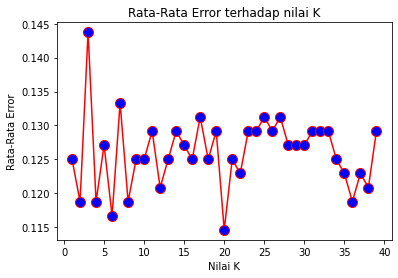

In [ ]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o', 
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

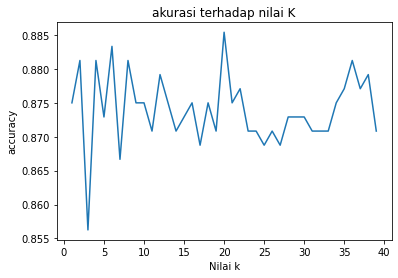

In [ ]:
score = {}
score_list = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    score[i] = metrics.accuracy_score(y_test,pred_i)
    score_list.append(metrics.accuracy_score(y_test,pred_i))

plt.figure()
plt.plot(range(1, 40), score_list)
plt.title('akurasi terhadap nilai K')
plt.xlabel('Nilai k')
plt.ylabel('accuracy')
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**1. KNN**

In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       430
           1       0.37      0.52      0.43        50

    accuracy                           0.86       480
   macro avg       0.65      0.71      0.67       480
weighted avg       0.88      0.86      0.87       480



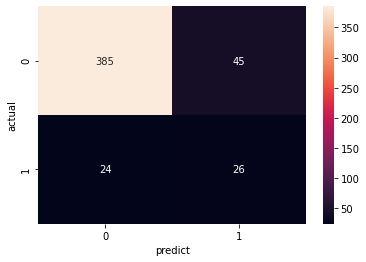

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax1 = sns.heatmap(cm,annot=True,fmt='2.0f')
ax1.set(xlabel='predict', ylabel='actual')
pltv.show()
#332 =  true negatif 
#23 = false positif 
#19 = false negatif
#26 = true positif

# 0 = bad quality
# 1 = good quality

#(TP/TP+FP)=presisi, (TP/TP+FN)= recall untuk data 1
#(TN/TN+FN)=presisi, (TN/TN+FP)=recall untuk data 0

accuracy menggambarkan seberapa akurat model dalam mengklasifikasikan dengan benar.

Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.

Recall atau sensitivity: menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi.

F-1 Score menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan.

cara menghitungnya :

accuracy = (TP+TN) / (TP+FP+FN+TN)

(TP/TP+FP)=presisi, (TP/TP+FN)= recall buat data 1

(TN/TN+FN)=presisi, (TN/TN+FP)=recall buat data 0

F-1 Score = (2 * Recall * Precision) / (Recall + Precision)

confusion matrix digunakan untuk melihat hasil apakah prediksinya mendapat true poritive atau true negative dan lainnya

https://socs.binus.ac.id/2020/11/01/confusion-matrix/

**2. Decision Tree**

In [ ]:
Dec_Tree = DecisionTreeClassifier(random_state=1)
Dec_Tree.fit(X_train, y_train)
y_predDec = Dec_Tree.predict(X_test)
print(classification_report(y_test, y_predDec))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       430
           1       0.41      0.70      0.52        50

    accuracy                           0.86       480
   macro avg       0.69      0.79      0.72       480
weighted avg       0.90      0.86      0.88       480



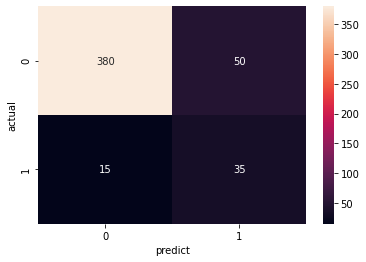

In [ ]:
cm1=confusion_matrix(y_test, y_predDec)
ax1 = sns.heatmap(cm1,annot=True,fmt='2.0f')
ax1.set(xlabel='predict', ylabel='actual')
pltv.show()

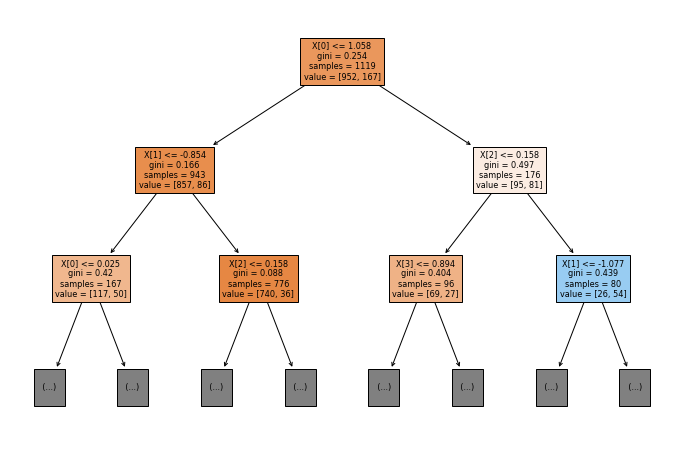

In [ ]:
fig = plt.figure(figsize=(12,8))
_=tree.plot_tree(Dec_Tree, max_depth=2,filled=True)

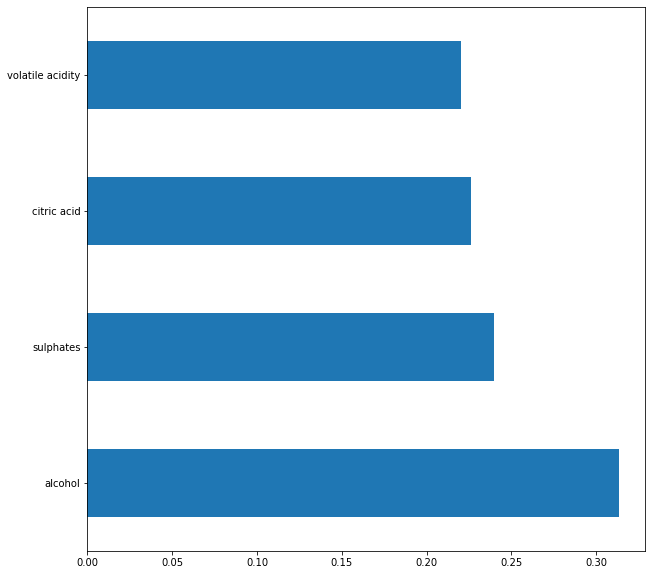

In [ ]:
feat_importances = pd.Series(Dec_Tree.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

**3. Random Forest**

In [ ]:
Random_Forest = RandomForestClassifier(random_state=1)
Random_Forest.fit(X_train, y_train)
y_pred = Random_Forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       430
           1       0.50      0.66      0.57        50

    accuracy                           0.90       480
   macro avg       0.73      0.79      0.75       480
weighted avg       0.91      0.90      0.90       480



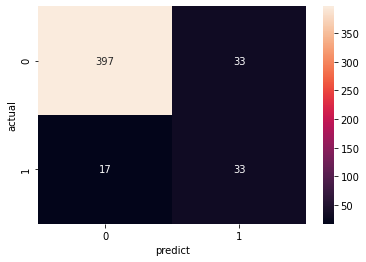

In [ ]:
cm1=confusion_matrix(y_test, y_pred)
ax1 = sns.heatmap(cm1,annot=True,fmt='2.0f')
ax1.set(xlabel='predict', ylabel='actual')
pltv.show()

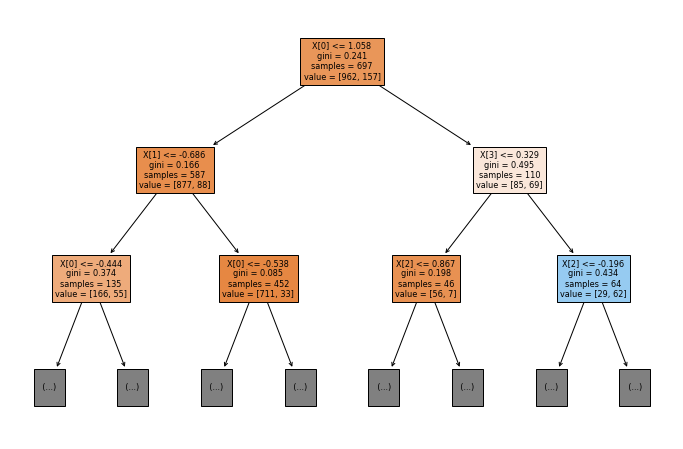

In [ ]:
plt.figure(figsize=(12,8))
_ = tree.plot_tree(Random_Forest.estimators_[0], max_depth=2, filled=True)

Feature Importance

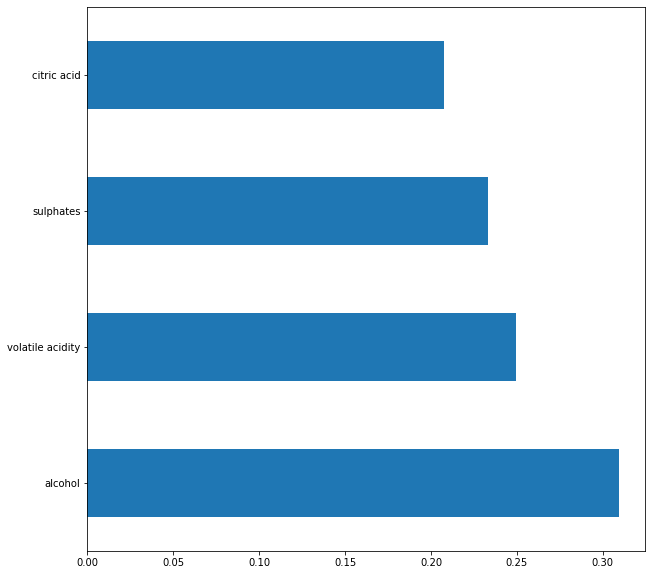

In [ ]:
feat_importances = pd.Series(Random_Forest.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))